In \[1\]:

    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings 
    warnings.filterwarnings('ignore')
    %matplotlib inline

In \[4\]:

    #loading of data
    df2 =pd.read_csv(r'C:\Users\admin\Downloads\diabetes.csv')

In \[5\]:

    #head of data
    df2.head()

Out\[5\]:

|     | Pregnancies | Glucose | BloodPressure | SkinThickness | Insulin | BMI  | DiabetesPedigreeFunction | Age | Outcome |
|-----|-------------|---------|---------------|---------------|---------|------|--------------------------|-----|---------|
| 0   | 6           | 148     | 72            | 35            | 0       | 33.6 | 0.627                    | 50  | 1       |
| 1   | 1           | 85      | 66            | 29            | 0       | 26.6 | 0.351                    | 31  | 0       |
| 2   | 8           | 183     | 64            | 0             | 0       | 23.3 | 0.672                    | 32  | 1       |
| 3   | 1           | 89      | 66            | 23            | 94      | 28.1 | 0.167                    | 21  | 0       |
| 4   | 0           | 137     | 40            | 35            | 168     | 43.1 | 2.288                    | 33  | 1       |

Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.<a href="#Outcome:-Class-Variable-(0-or-1)-where-‘0’-denotes-patient-is-not-having-diabetes-and-‘1’-denotes-patient-having-diabetes." class="anchor-link">¶</a>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In \[6\]:

    #finding out if the dataset contains any null values
    df2.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 768 entries, 0 to 767
    Data columns (total 9 columns):
     #   Column                    Non-Null Count  Dtype  
    ---  ------                    --------------  -----  
     0   Pregnancies               768 non-null    int64  
     1   Glucose                   768 non-null    int64  
     2   BloodPressure             768 non-null    int64  
     3   SkinThickness             768 non-null    int64  
     4   Insulin                   768 non-null    int64  
     5   BMI                       768 non-null    float64
     6   DiabetesPedigreeFunction  768 non-null    float64
     7   Age                       768 non-null    int64  
     8   Outcome                   768 non-null    int64  
    dtypes: float64(2), int64(7)
    memory usage: 54.1 KB

In \[7\]:

    #checking the number of rows and columns in data set
    df2.shape

Out\[7\]:

    (768, 9)

In \[8\]:

    #checking the number of rows and columns in data set
    df2.columns

Out\[8\]:

    Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
          dtype='object')

In \[9\]:

    #statistical summary
    df2.describe()

Out\[9\]:

|       | Pregnancies | Glucose    | BloodPressure | SkinThickness | Insulin    | BMI        | DiabetesPedigreeFunction | Age        | Outcome    |
|-------|-------------|------------|---------------|---------------|------------|------------|--------------------------|------------|------------|
| count | 768.000000  | 768.000000 | 768.000000    | 768.000000    | 768.000000 | 768.000000 | 768.000000               | 768.000000 | 768.000000 |
| mean  | 3.845052    | 120.894531 | 69.105469     | 20.536458     | 79.799479  | 31.992578  | 0.471876                 | 33.240885  | 0.348958   |
| std   | 3.369578    | 31.972618  | 19.355807     | 15.952218     | 115.244002 | 7.884160   | 0.331329                 | 11.760232  | 0.476951   |
| min   | 0.000000    | 0.000000   | 0.000000      | 0.000000      | 0.000000   | 0.000000   | 0.078000                 | 21.000000  | 0.000000   |
| 25%   | 1.000000    | 99.000000  | 62.000000     | 0.000000      | 0.000000   | 27.300000  | 0.243750                 | 24.000000  | 0.000000   |
| 50%   | 3.000000    | 117.000000 | 72.000000     | 23.000000     | 30.500000  | 32.000000  | 0.372500                 | 29.000000  | 0.000000   |
| 75%   | 6.000000    | 140.250000 | 80.000000     | 32.000000     | 127.250000 | 36.600000  | 0.626250                 | 41.000000  | 1.000000   |
| max   | 17.000000   | 199.000000 | 122.000000    | 99.000000     | 846.000000 | 67.100000  | 2.420000                 | 81.000000  | 1.000000   |

Glucose, BloodPressure, SkinThickness, and Insulin have minimum values as 0 which seems<a href="#Glucose,-BloodPressure,-SkinThickness,-and-Insulin-have-minimum-values-as-0-which-seems" class="anchor-link">¶</a>
===================================================================================================================================================================================================================

like an error hence we can treat this as missingvalues and impute
accordingly.

In \[10\]:

    #3. Handle the Columns with value '0'

In \[11\]:

    features = df2.columns
    cols = (df2[features] == 0).sum()
    print(cols)

    Pregnancies                 111
    Glucose                       5
    BloodPressure                35
    SkinThickness               227
    Insulin                     374
    BMI                          11
    DiabetesPedigreeFunction      0
    Age                           0
    Outcome                     500
    dtype: int64

In \[15\]:

    # plotting the percentage of missing values on graph

    plt.figure(figsize = (15, 5))
    percentage = (df2.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = sns.color_palette("Oranges", 8), edgecolor= "black")
    print(percentage.sort_values(ascending=False))
    plt.xticks(rotation=45, weight = "bold")
    plt.title("Percentage of Missing Values in each columns", weight= "bold")
    plt.xlabel('Columns', size=15, weight="bold")
    plt.ylabel('Missing values percentage', weight = "bold")
    plt.yticks(weight ="bold")
    plt.show

    Insulin                     48.697917
    SkinThickness               29.557292
    BloodPressure                4.557292
    BMI                          1.432292
    Glucose                      0.651042
    Outcome                      0.000000
    Age                          0.000000
    DiabetesPedigreeFunction     0.000000
    Pregnancies                  0.000000
    dtype: float64

Out\[15\]:

    <function matplotlib.pyplot.show(close=None, block=None)>

![](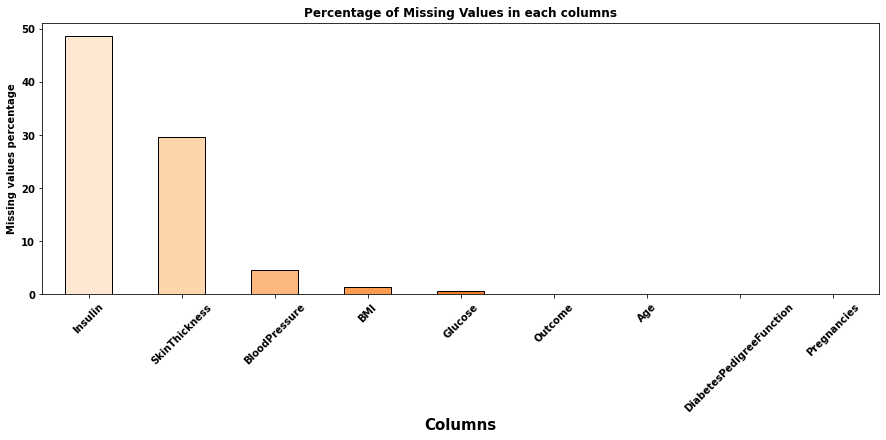%0A)

In \[12\]:

    df2[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df2[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
    df2.isnull().sum()

Out\[12\]:

    Pregnancies                   0
    Glucose                       5
    BloodPressure                35
    SkinThickness               227
    Insulin                     374
    BMI                          11
    DiabetesPedigreeFunction      0
    Age                           0
    Outcome                       0
    dtype: int64

Observations:<a href="#Observations:" class="anchor-link">¶</a>
===============================================================

Here we can note that 48% of insulin data has null values followed by
29% null values of Skin Thinkness. We will fix this later according to
skewness of data.

In \[17\]:

    # Distribution Curve


    columns = df2.drop('Outcome', axis = 1).columns
    df2[columns].hist(figsize= (20, 20), bins = "stone")

    plt.show()

![](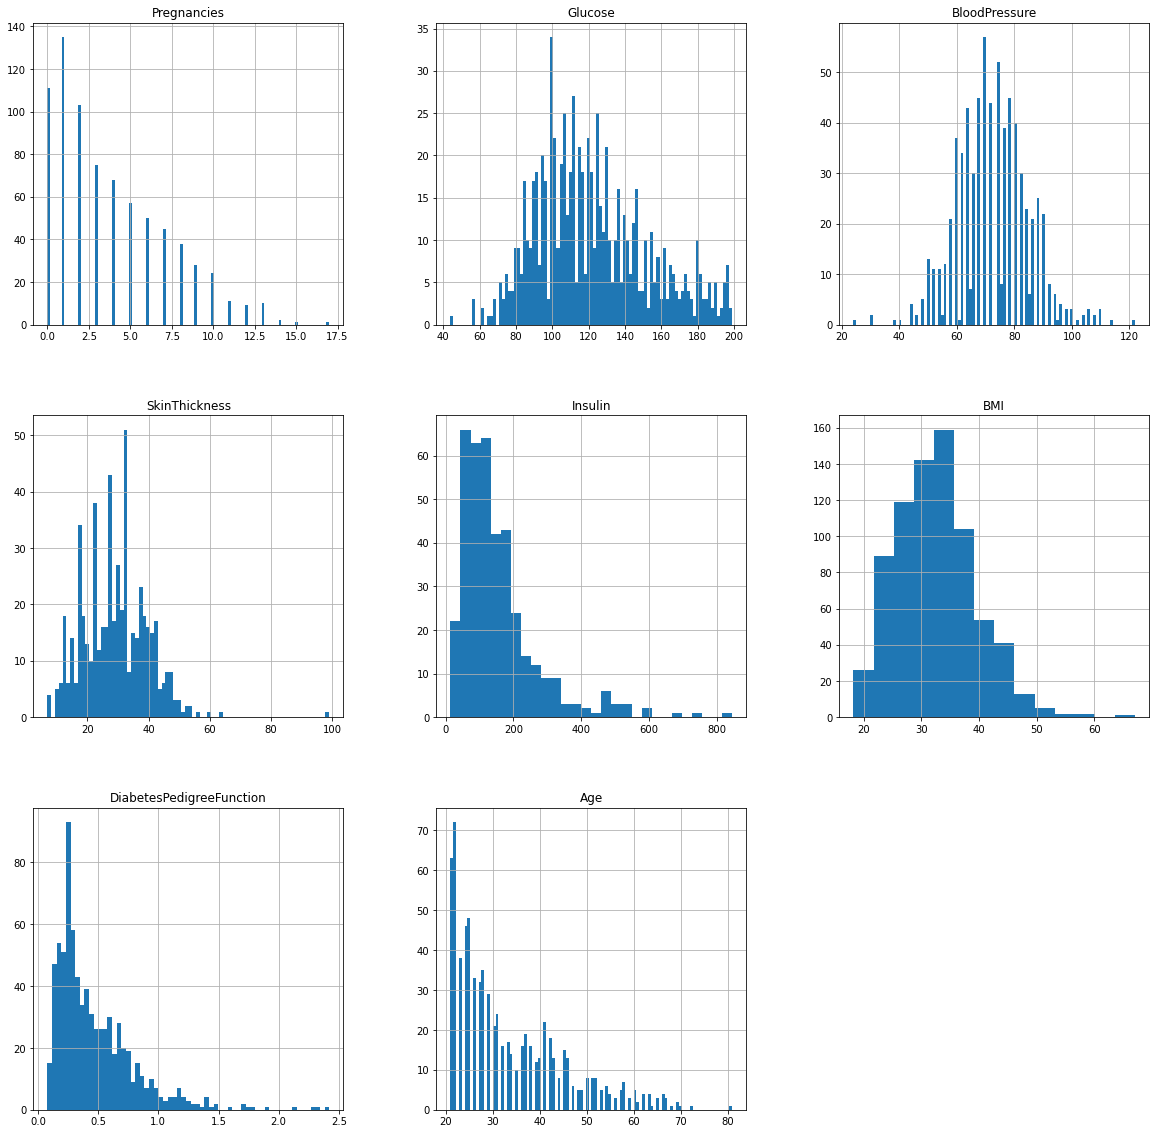%0A)

In \[23\]:

    sns.distplot(df2['Glucose'])

Out\[23\]:

    <AxesSubplot:xlabel='Glucose', ylabel='Density'>

![](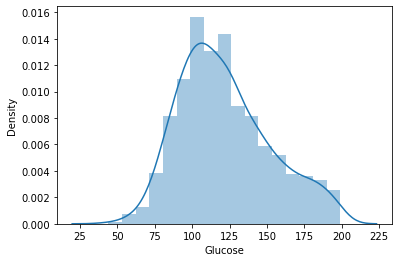%0A)

In \[25\]:

    sns.distplot(df2['Insulin'])

Out\[25\]:

    <AxesSubplot:xlabel='Insulin', ylabel='Density'>

![](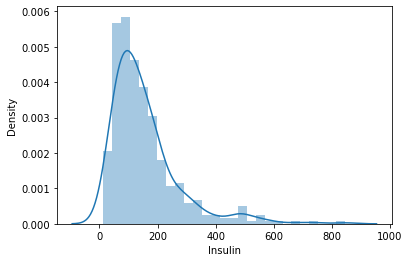%0A)

In \[33\]:

    sns.distplot(df2['DiabetesPedigreeFunction'])

Out\[33\]:

    <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

![](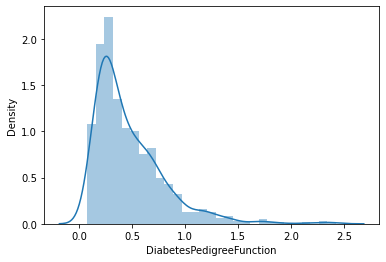%0A)

Because Loan amount variable has positive skewed,bcz its tall on right side therefore the missing value is imputed with the median<a href="#Because-Loan-amount-variable-has-positive-skewed,bcz-its-tall-on-right-side-therefore-the-missing-value-is-imputed-with-the-median" class="anchor-link">¶</a>
=========================================================================================================================================================================================================================================================================================================

In \[31\]:

    #same way we analyized
    df2.hist(figsize=(18,12))
    plt.show()

![](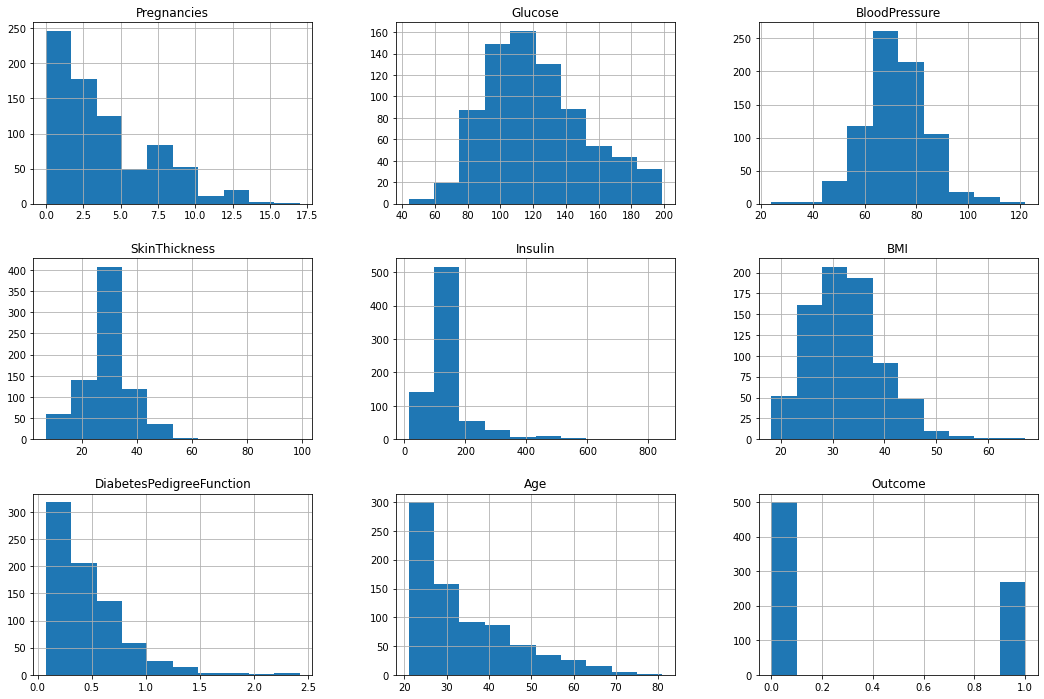%0A)

In \[32\]:

    #checking which columns have to replace with mean and median
    from scipy.stats import skew
    for col in df2.drop('Outcome', axis = 1).columns:
        print("Skewness for the column {} is {}".format(col, df2[col].skew()))

    Skewness for the column Pregnancies is 0.9016739791518588
    Skewness for the column Glucose is 0.5327186599872982
    Skewness for the column BloodPressure is 0.13730536744146796
    Skewness for the column SkinThickness is 0.8221731383793047
    Skewness for the column Insulin is 3.380019128212173
    Skewness for the column BMI is 0.5982526551146302
    Skewness for the column DiabetesPedigreeFunction is 1.919911066307204
    Skewness for the column Age is 1.1295967011444805

Columns like Pregnancies, Glucose, BloodPressure, SkinThickness and BMI
are not that much skewed. We can fill null values with the mean for
these columns, but for columns like Insulin and
DiabetesPedigreeFunction, we will have to replace them will median due
to the effect of skewness

In \[28\]:

    df2['Insulin'] = df2['Insulin'].fillna(df2['Insulin'].median()) # Filling null values with the median.

    for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
        df2[col] = df2[col].fillna(df2[col].mean())

In \[30\]:

    df2.isnull().sum()

Out\[30\]:

    Pregnancies                 0
    Glucose                     0
    BloodPressure               0
    SkinThickness               0
    Insulin                     0
    BMI                         0
    DiabetesPedigreeFunction    0
    Age                         0
    Outcome                     0
    dtype: int64

In \[34\]:

    df2.head()

Out\[34\]:

|     | Pregnancies | Glucose | BloodPressure | SkinThickness | Insulin | BMI  | DiabetesPedigreeFunction | Age | Outcome |
|-----|-------------|---------|---------------|---------------|---------|------|--------------------------|-----|---------|
| 0   | 6           | 148.0   | 72.0          | 35.00000      | 125.0   | 33.6 | 0.627                    | 50  | 1       |
| 1   | 1           | 85.0    | 66.0          | 29.00000      | 125.0   | 26.6 | 0.351                    | 31  | 0       |
| 2   | 8           | 183.0   | 64.0          | 29.15342      | 125.0   | 23.3 | 0.672                    | 32  | 1       |
| 3   | 1           | 89.0    | 66.0          | 23.00000      | 94.0    | 28.1 | 0.167                    | 21  | 0       |
| 4   | 0           | 137.0   | 40.0          | 35.00000      | 168.0   | 43.1 | 2.288                    | 33  | 1       |

In \[38\]:

    df2['Outcome'].value_counts()

Out\[38\]:

    0    500
    1    268
    Name: Outcome, dtype: int64

In \[43\]:

    #healthy people are 500
    #diabeties people are 268

In \[39\]:

    sns.countplot(x = "Outcome", data =df2)

Out\[39\]:

    <AxesSubplot:xlabel='Outcome', ylabel='count'>

![](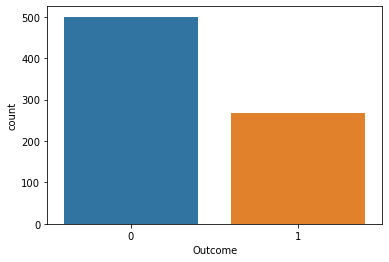%0A)

In \[44\]:

    #distribution of blood pressure(we can similarly visualize other columns like this)
    plt.figure()
    ax = sns.distplot(df2['BloodPressure'][df2.Outcome == 1], color ="darkturquoise", rug=True)
    sns.distplot(df2['BloodPressure'][df2.Outcome == 0], color ="lightcoral", rug=True)
    plt.legend(['Diabetes', 'No Diabetes'])

Out\[44\]:

    <matplotlib.legend.Legend at 0x235b6466ca0>

![](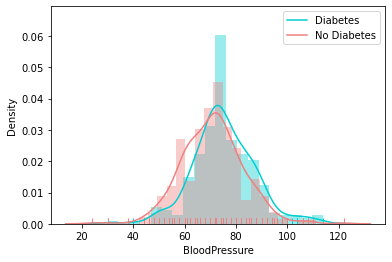%0A)

In \[46\]:

    #4. Visualization of Target Variable
    import matplotlib.style as style
    style.available

    style.use('seaborn-pastel')
    labels = ["Healthy", "Diabetic"]
    df2['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(9,9))

Out\[46\]:

    array([<AxesSubplot:ylabel='Outcome'>], dtype=object)

![](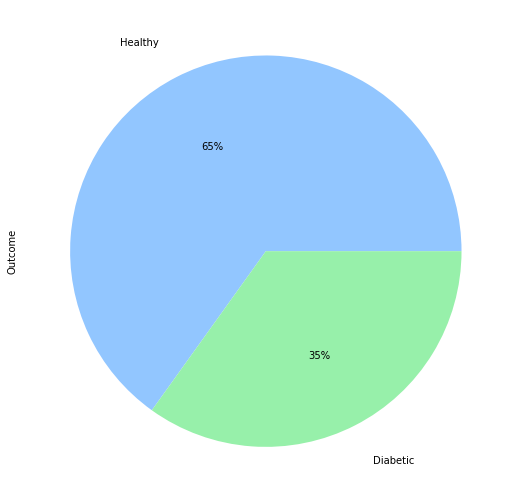%0A)

In \[47\]:

    plt.style.use('ggplot') # TO GET AN IDEA OF OUTLIERS 

    f, ax = plt.subplots(figsize=(11, 15))

    ax.set_facecolor('#09FBD3')
    ax.set(xlim=(-.05, 200))
    plt.ylabel('Variables')
    plt.title("Overview")
    ax = sns.boxplot(data = df2, 
      orient = 'h', 
      palette = 'Set2',)

![](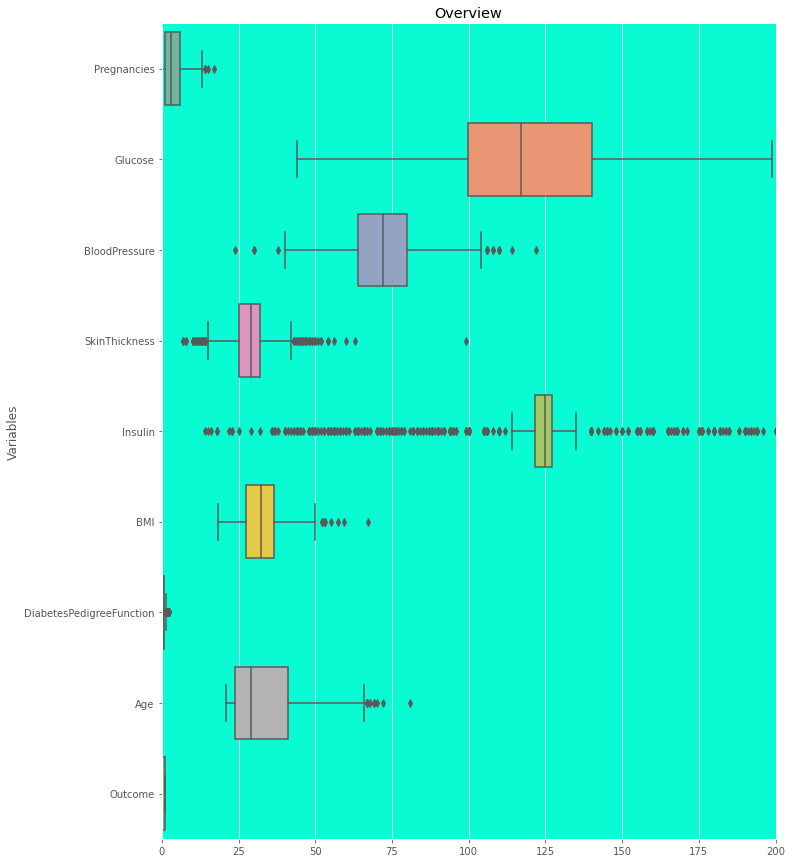%0A)

In \[54\]:

    sns.boxplot(x='Outcome',y='Insulin',data=df2)

Out\[54\]:

    <AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

![](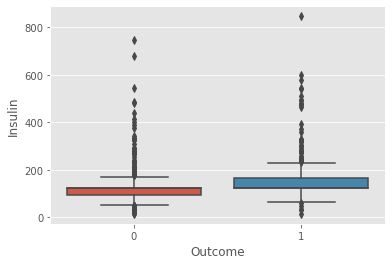%0A)

In \[55\]:

    sns.relplot(x='BMI', y= 'Glucose', data=df2)

Out\[55\]:

    <seaborn.axisgrid.FacetGrid at 0x235b59dcdf0>

![](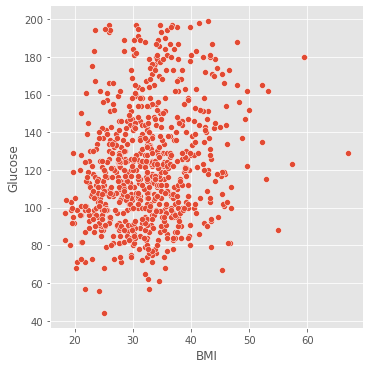%0A)

In \[56\]:

    sns.regplot(x='BMI', y= 'Glucose', data=df2)

Out\[56\]:

    <AxesSubplot:xlabel='BMI', ylabel='Glucose'>

![](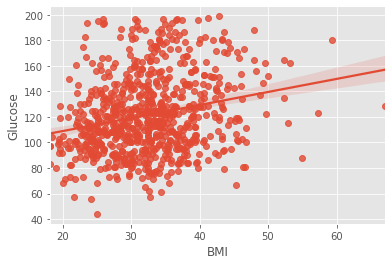%0A)

In \[57\]:

    sns.scatterplot(x='Glucose', y= 'Insulin', data=df2)

Out\[57\]:

    <AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

![](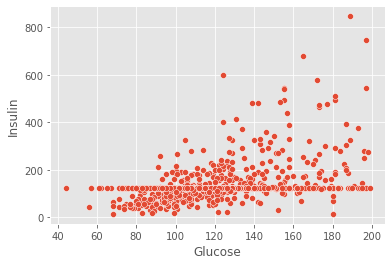%0A)

In \[58\]:

    sns.lineplot(x='Glucose', y= 'Insulin', data=df2)

Out\[58\]:

    <AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

![](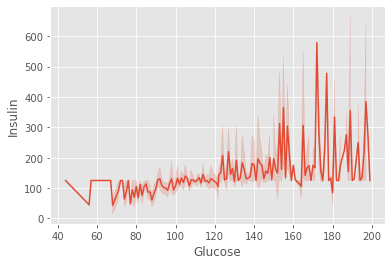%0A)

In \[51\]:

    df2.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 768 entries, 0 to 767
    Data columns (total 9 columns):
     #   Column                    Non-Null Count  Dtype  
    ---  ------                    --------------  -----  
     0   Pregnancies               768 non-null    int64  
     1   Glucose                   768 non-null    float64
     2   BloodPressure             768 non-null    float64
     3   SkinThickness             768 non-null    float64
     4   Insulin                   768 non-null    float64
     5   BMI                       768 non-null    float64
     6   DiabetesPedigreeFunction  768 non-null    float64
     7   Age                       768 non-null    int64  
     8   Outcome                   768 non-null    int64  
    dtypes: float64(6), int64(3)
    memory usage: 54.1 KB

In \[52\]:

    df2.corr()

Out\[52\]:

|                          | Pregnancies | Glucose  | BloodPressure | SkinThickness | Insulin  | BMI      | DiabetesPedigreeFunction | Age      | Outcome  |
|--------------------------|-------------|----------|---------------|---------------|----------|----------|--------------------------|----------|----------|
| Pregnancies              | 1.000000    | 0.127911 | 0.208522      | 0.082989      | 0.025047 | 0.021565 | -0.033523                | 0.544341 | 0.221898 |
| Glucose                  | 0.127911    | 1.000000 | 0.218367      | 0.192991      | 0.419064 | 0.230941 | 0.137060                 | 0.266534 | 0.492928 |
| BloodPressure            | 0.208522    | 0.218367 | 1.000000      | 0.192816      | 0.045087 | 0.281268 | -0.002763                | 0.324595 | 0.166074 |
| SkinThickness            | 0.082989    | 0.192991 | 0.192816      | 1.000000      | 0.154678 | 0.542398 | 0.100966                 | 0.127872 | 0.215299 |
| Insulin                  | 0.025047    | 0.419064 | 0.045087      | 0.154678      | 1.000000 | 0.180170 | 0.126503                 | 0.097101 | 0.203790 |
| BMI                      | 0.021565    | 0.230941 | 0.281268      | 0.542398      | 0.180170 | 1.000000 | 0.153400                 | 0.025519 | 0.311924 |
| DiabetesPedigreeFunction | -0.033523   | 0.137060 | -0.002763     | 0.100966      | 0.126503 | 0.153400 | 1.000000                 | 0.033561 | 0.173844 |
| Age                      | 0.544341    | 0.266534 | 0.324595      | 0.127872      | 0.097101 | 0.025519 | 0.033561                 | 1.000000 | 0.238356 |
| Outcome                  | 0.221898    | 0.492928 | 0.166074      | 0.215299      | 0.203790 | 0.311924 | 0.173844                 | 0.238356 | 1.000000 |

In \[53\]:

    plt.figure(figsize = (12,10))

    sns.heatmap(df2.corr(), annot =True)

Out\[53\]:

    <AxesSubplot:>

![](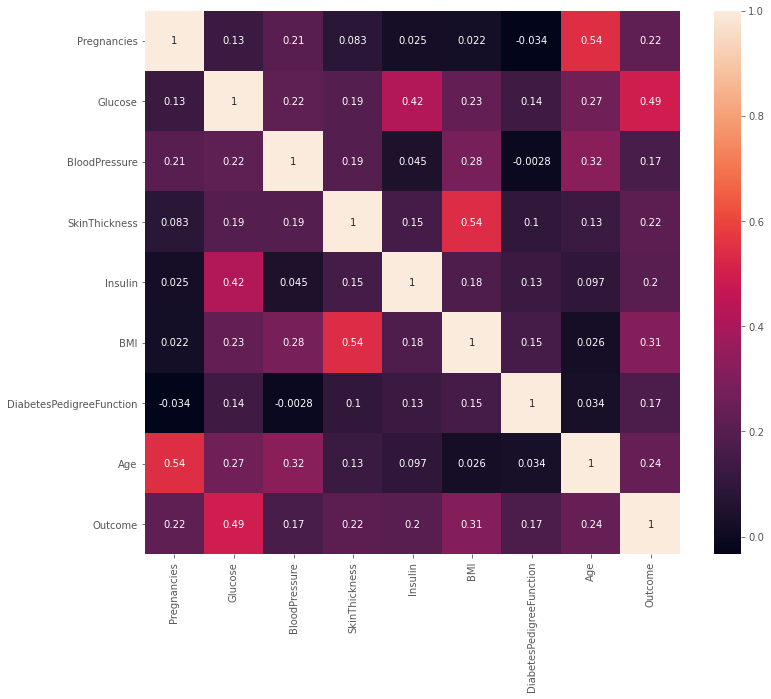%0A)

In \[59\]:

    #checking coreerelation with target variable

In \[61\]:

    corr_matrix=df2.corr()
    # How much each attibute co related with the Outcome
    corr_matrix["Outcome"].sort_values(ascending=False)

Out\[61\]:

    Outcome                     1.000000
    Glucose                     0.492928
    BMI                         0.311924
    Age                         0.238356
    Pregnancies                 0.221898
    SkinThickness               0.215299
    Insulin                     0.203790
    DiabetesPedigreeFunction    0.173844
    BloodPressure               0.166074
    Name: Outcome, dtype: float64

TRAINING AND TESTING DATA<a href="#TRAINING-AND-TESTING-DATA" class="anchor-link">¶</a>
=======================================================================================

In \[63\]:

    #train_test_splitting of the dataset

    x = df2.drop(columns = 'Outcome')

    # Getting Predicting Value
    y = df2['Outcome']

    from sklearn.model_selection import train_test_split 
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In \[64\]:

    print(len(x_train))
    print(len(x_test))
    print(len(y_train))
    print(len(y_test))

    614
    154
    614
    154

MODELS<a href="#MODELS" class="anchor-link">¶</a>
=================================================

1.  Logistic Regression

In \[65\]:

    from sklearn.linear_model import LogisticRegression
    reg = LogisticRegression()
    reg.fit(x_train,y_train)  
    y_pred=reg.predict(x_test)

In \[66\]:

    from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    print("Classification Report is:\n",classification_report(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Training Score:\n",reg.score(x_train,y_train)*100)
    print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
    print("R2 score is:\n",r2_score(y_test,y_pred))

    Classification Report is:
                   precision    recall  f1-score   support

               0       0.85      0.89      0.87       107
               1       0.71      0.64      0.67        47

        accuracy                           0.81       154
       macro avg       0.78      0.76      0.77       154
    weighted avg       0.81      0.81      0.81       154

    Confusion Matrix:
     [[95 12]
     [17 30]]
    Training Score:
     76.54723127035831
    Mean Squared Error:
     0.18831168831168832
    R2 score is:
     0.11195068602107783

In \[67\]:

    print(accuracy_score(y_test,y_pred)*100)

    81.16883116883116

so we get accuarcy score of 81.16 using logistic regression

1.  KNeighborsClassifier

In \[68\]:

    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=7)

    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)

In \[69\]:

    print("Classification Report is:\n",classification_report(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Training Score:\n",knn.score(x_train,y_train)*100)
    print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
    print("R2 score is:\n",r2_score(y_test,y_pred))

    Classification Report is:
                   precision    recall  f1-score   support

               0       0.80      0.83      0.82       107
               1       0.58      0.53      0.56        47

        accuracy                           0.74       154
       macro avg       0.69      0.68      0.69       154
    weighted avg       0.73      0.74      0.74       154

    Confusion Matrix:
     [[89 18]
     [22 25]]
    Training Score:
     78.0130293159609
    Mean Squared Error:
     0.2597402597402597
    R2 score is:
     -0.22489560548816856

In \[70\]:

    print(accuracy_score(y_test,y_pred)*100)

    74.02597402597402

1.  SVC

In \[71\]:

    from sklearn.svm import SVC

    svc = SVC()
    svc.fit(x_train, y_train)

Out\[71\]:

    SVC()

In \[72\]:

    y_pred=svc.predict(x_test)
    print("Classification Report is:\n",classification_report(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Training Score:\n",svc.score(x_train,y_train)*100)
    print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
    print("R2 score is:\n",r2_score(y_test,y_pred))

    Classification Report is:
                   precision    recall  f1-score   support

               0       0.81      0.92      0.86       107
               1       0.73      0.51      0.60        47

        accuracy                           0.79       154
       macro avg       0.77      0.71      0.73       154
    weighted avg       0.78      0.79      0.78       154

    Confusion Matrix:
     [[98  9]
     [23 24]]
    Training Score:
     75.8957654723127
    Mean Squared Error:
     0.2077922077922078
    R2 score is:
     0.020083515609465197

In \[73\]:

    print(accuracy_score(y_test,y_pred)*100)

    79.22077922077922

1.  Naive Bayes¶

In \[74\]:

    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(x_train,y_train)

Out\[74\]:

    GaussianNB()

In \[75\]:

    y_pred=gnb.predict(x_test)
    print("Classification Report is:\n",classification_report(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Training Score:\n",gnb.score(x_train,y_train)*100)
    print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
    print("R2 score is:\n",r2_score(y_test,y_pred))

    Classification Report is:
                   precision    recall  f1-score   support

               0       0.84      0.86      0.85       107
               1       0.66      0.62      0.64        47

        accuracy                           0.79       154
       macro avg       0.75      0.74      0.74       154
    weighted avg       0.78      0.79      0.78       154

    Confusion Matrix:
     [[92 15]
     [18 29]]
    Training Score:
     74.5928338762215
    Mean Squared Error:
     0.21428571428571427
    R2 score is:
     -0.01053887452773905

In \[76\]:

    print(accuracy_score(y_test,y_pred)*100)

    78.57142857142857

1.  DECISION TREE CLASSIFIER

In \[77\]:

    from sklearn.tree import DecisionTreeClassifier
    dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

    dtree.fit(x_train,y_train)

Out\[77\]:

    DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In \[78\]:

    y_pred=dtree.predict(x_test)
    print("Classification Report is:\n",classification_report(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Training Score:\n",dtree.score(x_train,y_train)*100)
    print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
    print("R2 score is:\n",r2_score(y_test,y_pred))

    Classification Report is:
                   precision    recall  f1-score   support

               0       0.79      0.86      0.83       107
               1       0.61      0.49      0.54        47

        accuracy                           0.75       154
       macro avg       0.70      0.67      0.68       154
    weighted avg       0.74      0.75      0.74       154

    Confusion Matrix:
     [[92 15]
     [24 23]]
    Training Score:
     82.57328990228014
    Mean Squared Error:
     0.2532467532467532
    R2 score is:
     -0.1942732153509643

In \[79\]:

    print(accuracy_score(y_test,y_pred)*100)

    74.67532467532467

1.  RandomForestClassifier

In \[80\]:

    from sklearn.ensemble import RandomForestClassifier
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)

Out\[80\]:

    RandomForestClassifier()

In \[81\]:

    y_pred=rfc.predict(x_test)
    print("Classification Report is:\n",classification_report(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Training Score:\n",rfc.score(x_train,y_train)*100)
    print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
    print("R2 score is:\n",r2_score(y_test,y_pred))

    Classification Report is:
                   precision    recall  f1-score   support

               0       0.85      0.88      0.86       107
               1       0.70      0.64      0.67        47

        accuracy                           0.81       154
       macro avg       0.77      0.76      0.76       154
    weighted avg       0.80      0.81      0.80       154

    Confusion Matrix:
     [[94 13]
     [17 30]]
    Training Score:
     100.0
    Mean Squared Error:
     0.19480519480519481
    R2 score is:
     0.08132829588387358

In \[82\]:

    print(accuracy_score(y_test,y_pred)*100)

    80.51948051948052

1.  AdaBoostClassifier

In \[83\]:

    from sklearn.ensemble import AdaBoostClassifier
    adb = AdaBoostClassifier(base_estimator = None)
    adb.fit(x_train,y_train)

Out\[83\]:

    AdaBoostClassifier()

In \[84\]:

    y_pred=adb.predict(x_test)

In \[85\]:

    print("Classification Report is:\n",classification_report(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Training Score:\n",adb.score(x_train,y_train)*100)
    print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
    print("R2 score is:\n",r2_score(y_test,y_pred))

    Classification Report is:
                   precision    recall  f1-score   support

               0       0.86      0.83      0.85       107
               1       0.65      0.70      0.67        47

        accuracy                           0.79       154
       macro avg       0.76      0.77      0.76       154
    weighted avg       0.80      0.79      0.79       154

    Confusion Matrix:
     [[89 18]
     [14 33]]
    Training Score:
     83.71335504885994
    Mean Squared Error:
     0.2077922077922078
    R2 score is:
     0.020083515609465197

In \[86\]:

    print(accuracy_score(y_test,y_pred)*100)

    79.22077922077922

1.  Gradient Boosting Classifier

In \[87\]:

    from sklearn.ensemble import GradientBoostingClassifier
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train,y_train)

Out\[87\]:

    GradientBoostingClassifier()

In \[88\]:

    y_pred=gbc.predict(x_test)

In \[89\]:

    print("Classification Report is:\n",classification_report(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Training Score:\n",gbc.score(x_train,y_train)*100)
    print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
    print("R2 score is:\n",r2_score(y_test,y_pred))

    Classification Report is:
                   precision    recall  f1-score   support

               0       0.88      0.86      0.87       107
               1       0.69      0.72      0.71        47

        accuracy                           0.82       154
       macro avg       0.79      0.79      0.79       154
    weighted avg       0.82      0.82      0.82       154

    Confusion Matrix:
     [[92 15]
     [13 34]]
    Training Score:
     91.53094462540716
    Mean Squared Error:
     0.18181818181818182
    R2 score is:
     0.14257307615828196

In \[90\]:

    print(accuracy_score(y_test,y_pred)*100)

    81.81818181818183

1.  XGBClassifier

In \[91\]:

    from xgboost import XGBClassifier

    xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                    max_depth = 5, alpha = 10, n_estimators = 10)

    xgb.fit(x_train, y_train)

    ---------------------------------------------------------------------------
    ModuleNotFoundError                       Traceback (most recent call last)
    <ipython-input-91-34a3c469147e> in <module>
    ----> 1 from xgboost import XGBClassifier
          2 
          3 xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
          4                 max_depth = 5, alpha = 10, n_estimators = 10)
          5 

    ModuleNotFoundError: No module named 'xgboost'

1.  ExtraTreesClassifier

In \[92\]:

    from sklearn.ensemble import ExtraTreesClassifier
    etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
    etc.fit(x_train,y_train)

Out\[92\]:

    ExtraTreesClassifier(random_state=0)

In \[93\]:

    y_pred=etc.predict(x_test)

In \[94\]:

    print("Classification Report is:\n",classification_report(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Training Score:\n",etc.score(x_train,y_train)*100)
    print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
    print("R2 score is:\n",r2_score(y_test,y_pred))

    Classification Report is:
                   precision    recall  f1-score   support

               0       0.86      0.86      0.86       107
               1       0.68      0.68      0.68        47

        accuracy                           0.81       154
       macro avg       0.77      0.77      0.77       154
    weighted avg       0.81      0.81      0.81       154

    Confusion Matrix:
     [[92 15]
     [15 32]]
    Training Score:
     100.0
    Mean Squared Error:
     0.19480519480519481
    R2 score is:
     0.08132829588387358

In \[95\]:

    print(accuracy_score(y_test,y_pred)*100)

    80.51948051948052

In \[ \]: